## Projeto de PDS
Igor Dias da Silva

------
LINKS:

https://scipy-cookbook.readthedocs.io/items/ApplyFIRFilter.html

https://dsp.stackexchange.com/questions/32076/fft-to-spectrum-in-decibel

------

#### Questão 1.1

 Utilizando janelamento, crie um filtro FIR passa alta com as seguintes especificações:
 
 ωs = 0.6π, ωp = 0.75π; As = 50 dB

Justifique todas as suas decisões de projeto. 

Importando as bibliotecas necessárias.

In [1]:
import numpy as np                   # Para calculos em geral, principalmente de matrizes
from scipy import signal,special     # Para pegar a janela de Kaiser e comparar com a que eu gerei
from scipy.fftpack import fft        # Transformada rápida de Fourier
from scipy.signal import fftconvolve # Convolução usando a transformada rápida de Fourier
from scipy.special import factorial     # Fatorial
import matplotlib.pyplot as plt      # Para plotar resultados

Definindo as funções para o cálculo da janela Kaiser

In [2]:
# Essa implementação da overflow para valores de x a partir de 189
# Mas para esse exercicio isso não é um problema
# Esse problema não ocorre com a função de Bessel modificada ja implementada
# pela biblioteca scipy, special.i0(189)
def Bessel(x):
    saida = 1.0
    saida_antiga = 0
    convergencia = 1
    n = 1
#     fatorial_n = 1
    termo_somatorio = 0
    while(convergencia > 1e-3): # Quando a diferença entre os valores é menor que 10^-3, para
        termo_somatorio = (((x/2)**n)/(factorial(n)))**2
        n += 1
#         fatorial_n *= n
        saida += termo_somatorio
        convergencia = np.abs(saida - saida_antiga)
        saida_antiga = saida
        
    return saida

In [3]:
def janela_Kaiser(beta , M):
    w = np.arange(0 , M)/1.0 # Essa divisão por 1 força o array pra float
    for n in range(0 , M):
#         numerador  = Bessel(beta*np.sqrt(1 - (1 - 2*n/M)**2))
#         denominador = Bessel(beta)
        numerador  = special.i0(beta*np.sqrt(1 - (1 - 2*n/M)**2))
        denominador = special.i0(beta)
        w[n] = numerador/denominador
    return w

Filtro ideal

In [4]:
def filtro_ideal(Wc , M):
    filtro = np.arange(0 , M)/1.0
    alpha = (M - 1)/2
    for n in range(0 , M):
        filtro[n] = np.sin(Wc*(n - alpha))/(np.pi*(n - alpha))
    return filtro

Calculando a janela para o problema em questão

In [5]:
# Dados da questão
Ws = 0.3*np.pi
Wp = 0.2*np.pi
As = 50


Wc = (Ws + Wp)/2

delta_W = np.abs(Wp - Ws)

beta = 0.5842*(As - 21)**0.4 + 0.07886*(As - 21) # Para As =  50

M = int(np.ceil(((As - 7.95)/(14.36*delta_W/(2*np.pi))+1)) + 1)

In [6]:
w = janela_Kaiser(beta , M)

<StemContainer object of 3 artists>

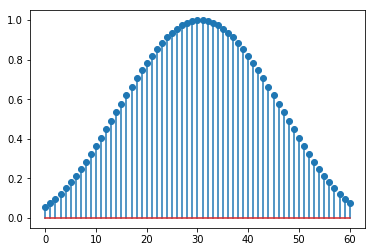

In [7]:
plt.stem(w)

In [8]:
hd = filtro_ideal(Wc , M)

/home/igordds/anaconda3/envs/pds/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


<StemContainer object of 3 artists>

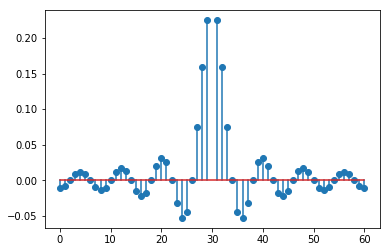

In [9]:
plt.stem(hd)

In [10]:
h = hd*w

<StemContainer object of 3 artists>

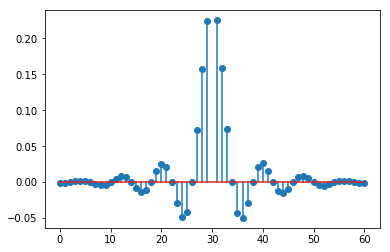

In [11]:
plt.stem(h)

/home/igordds/anaconda3/envs/pds/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 0, 'Frequency [rad/sample]')

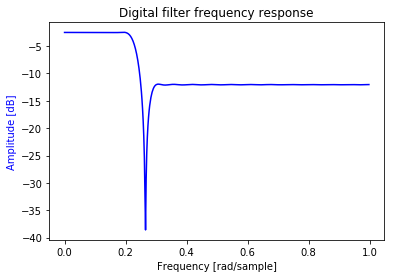

In [12]:
# w = np.arange(500)/np.pi
# mag = np.abs(h)
# h_db = 20*np.log10((mag+0.00001)/max(mag))

# plt.plot(h_db)

# w, h_db = signal.freqz(h)
# plt.plot(w, 20 * np.log10(abs(h_db)), 'b')
h[np.isnan(h)] = 0
w, h2 = signal.freqz(h)
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(w/np.pi, 20 * np.log10(abs(h2)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

Text(0.5, 0, 'Frequency [rad/sample]')

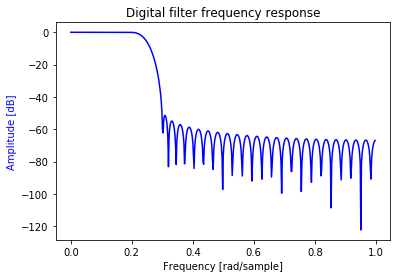

In [13]:
# b = signal.firwin(80, 0.5, window=('kaiser', 8))
b = signal.firwin(M, Wc/np.pi, window=('kaiser', beta))
w, h = signal.freqz(b)
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(w/np.pi, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

In [17]:
b.shape

(61,)